In [1]:
import numpy as np
import pandas as pd
#!pip install pycaret
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing# this is used for multithreading
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
from scipy import stats
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings("ignore")
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
import random
#!pip install xgboost --upgrade
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn import svm
!pip install xgboost --upgrade
from xgboost import XGBClassifier

In [2]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(8,8))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(8,8))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(8,8))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/case_study_1/diabetic_data.csv')
print(data.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


# Data Pre-Processing

In [5]:
# In given dataset missing values are encoded as '?'.
data.replace("?",np.nan).isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
# Creating the target variable to solve the binary classification
# Reduce Output Class to Binary
new_target = data['readmitted'].replace('>30','NO')
print(new_target.unique())
new_target = new_target.replace({ 'NO' : 0, '<30' : 1 })
print(new_target.unique())
print(new_target.value_counts())

['NO' '<30']
[0 1]
0    90409
1    11357
Name: readmitted, dtype: int64


In [7]:
# removing weight column from dataset because more then 80% values are unknown.
# encounter_id and patient_id are just unique number , these columns contains no information .
X = data.drop(['encounter_id', 'patient_nbr','weight','readmitted'] ,axis= 1) 
# Replacing missing values with 'Missing'.
X = X.replace('?','Missing')

# Feature creation 

In [8]:
X['Service_Utilization'] = X['number_outpatient']+X['number_emergency']+X['number_inpatient']

# preprocessing numerical data 

In [9]:
numeric_data = X.select_dtypes(include=[np.number])
numeric_data = numeric_data.drop(['discharge_disposition_id','admission_type_id','admission_source_id'],axis=1)
num_col = numeric_data.columns
num_col

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'Service_Utilization'],
      dtype='object')

In [10]:
for i in num_col: 
  print(i+' skewness', stats.skew(X[i])) 

time_in_hospital skewness 1.1339820044679754
num_lab_procedures skewness -0.23654043395050994
num_procedures skewness 1.3163953596463924
num_medications skewness 1.3266525795561763
number_outpatient skewness 8.83282873148614
number_emergency skewness 22.855245265737302
number_inpatient skewness 3.6140857207710266
number_diagnoses skewness -0.8767333158181772
Service_Utilization skewness 5.315131226117176


In [11]:
for i in num_col:
  print(i)
  print(X[i].quantile([num/100 for num in range(0,10)]))
  print(X[i].quantile([num/100 for num in range(0,100,10)]))
  print(X[i].quantile([num/100 for num in range(91,100)]))
  print(X[i].quantile([num/1000 for num in range(991,1000)]))
  print('####################')

time_in_hospital
0.00    1.0
0.01    1.0
0.02    1.0
0.03    1.0
0.04    1.0
0.05    1.0
0.06    1.0
0.07    1.0
0.08    1.0
0.09    1.0
Name: time_in_hospital, dtype: float64
0.0    1.0
0.1    1.0
0.2    2.0
0.3    2.0
0.4    3.0
0.5    4.0
0.6    4.0
0.7    5.0
0.8    7.0
0.9    9.0
Name: time_in_hospital, dtype: float64
0.91     9.0
0.92     9.0
0.93    10.0
0.94    10.0
0.95    11.0
0.96    11.0
0.97    12.0
0.98    13.0
0.99    14.0
Name: time_in_hospital, dtype: float64
0.991    14.0
0.992    14.0
0.993    14.0
0.994    14.0
0.995    14.0
0.996    14.0
0.997    14.0
0.998    14.0
0.999    14.0
Name: time_in_hospital, dtype: float64
####################
num_lab_procedures
0.00     1.0
0.01     1.0
0.02     1.0
0.03     1.0
0.04     2.0
0.05     4.0
0.06     7.0
0.07     9.0
0.08    10.0
0.09    12.0
Name: num_lab_procedures, dtype: float64
0.0     1.0
0.1    14.0
0.2    27.0
0.3    35.0
0.4    40.0
0.5    44.0
0.6    49.0
0.7    54.0
0.8    60.0
0.9    67.0
Name: num_lab_procedure

In [12]:
num_col
val = [14, 98, 6, 60, 14, 10, 11, 10, 21]
dic_replace = dict(zip(num_col, val))
dic_replace

{'Service_Utilization': 21,
 'num_lab_procedures': 98,
 'num_medications': 60,
 'num_procedures': 6,
 'number_diagnoses': 10,
 'number_emergency': 10,
 'number_inpatient': 11,
 'number_outpatient': 14,
 'time_in_hospital': 14}

In [13]:
for i in dic_replace.keys():
  X[i] = np.where(X[i] > dic_replace[i], dic_replace[i]+1, X[i])

In [14]:
for i in num_col:
  print(i+' skewness_after_removal', stats.skew(X[i]))
  print(i+' skewness_log', stats.skew(np.log(X[i]+0.001)))
  print(i+' skewness_sqrt', stats.skew(np.sqrt(X[i])))
  print('###############################')

time_in_hospital skewness_after_removal 1.1339820044679754
time_in_hospital skewness_log -0.20370301340775532
time_in_hospital skewness_sqrt 0.47359602841216347
###############################
num_lab_procedures skewness_after_removal -0.244328326527498
num_lab_procedures skewness_log -2.522329807331502
num_lab_procedures skewness_sqrt -1.16183756839876
###############################
num_procedures skewness_after_removal 1.3163953596463924
num_procedures skewness_log -0.12193243888682898
num_procedures skewness_sqrt 0.4054619049004293
###############################
num_medications skewness_after_removal 1.2862961943812707
num_medications skewness_log -0.7474361848293202
num_medications skewness_sqrt 0.33504920986291464
###############################
number_outpatient skewness_after_removal 5.85778710424142
number_outpatient skewness_log 1.8479805376168608
number_outpatient skewness_sqrt 2.605195589627679
###############################
number_emergency skewness_after_removal 7.27937

In [15]:
box_cox = ['time_in_hospital', 'num_medications',  'number_diagnoses']
for i in box_cox:
  print(i)
  x,y = stats.boxcox(X[i])
  print(i+' skewness', stats.skew(x))

time_in_hospital
time_in_hospital skewness -0.023546502202383395
num_medications
num_medications skewness 0.03157764580139208
number_diagnoses
number_diagnoses skewness -0.4711838025417046


# log transformation on skewed data

In [16]:
for i in num_col:
  X[i] = X[i].apply(lambda x: np.log(x+1))

# Label enconding categorical data

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing

# saving label encodning :
data_label = X.copy()
label_dict_save = dict()


for cn in data_label.columns:
    if data_label[cn].dtype == object:
      label = LabelEncoder()
      data_label[cn] = label.fit_transform(data_label[cn])
      label_dict_save[cn] = label
      pass

X = data_label
y = new_target

In [18]:
label_dict_save
num_col

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'Service_Utilization'],
      dtype='object')

# data balancing : over sampling 

In [19]:
from imblearn.over_sampling import KMeansSMOTE, ADASYN

oversample = ADASYN()

X,y = oversample.fit_resample(X,y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

X_train = X_train.reset_index().drop(['index'], axis=1)
X_test = X_test.reset_index().drop(['index'], axis=1)
y_train = y_train.reset_index().drop(['index'], axis=1)
y_test = y_test.reset_index().drop(['index'], axis=1)

In [21]:
X_CV, X_test, y_CV, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)


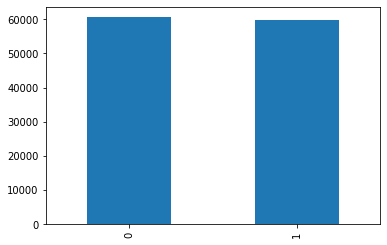

In [22]:
y_train['readmitted'].value_counts().plot(kind='bar')
plt.show()

# Custom Stacking classifier :

In [33]:
def custom_ensemble(X_train,y_train,X_test, n_estimators, base_model, meta_model):
  # split data
  X_D1, X_D2, y_D1, y_D2 = train_test_split(X_train,y_train, test_size=0.4, stratify=y_train)
  X_D1 = X_D1.reset_index().drop(['index'], axis=1)
  X_D2 = X_D2.reset_index().drop(['index'], axis=1)
  y_D1 = y_D1.reset_index().drop(['index'], axis=1)
  y_D2 = y_D2.reset_index().drop(['index'], axis=1)
  #######################################################
  # train base models
  save_model = []
  meta_data = pd.DataFrame()
  for ne in range(0, n_estimators):
    # sample data
    # randomly selecting 50000 points from total 71928 points.
    res = random.sample(range(0, X_D1.shape[0]), 70000)
    sx = X_D1.loc[res]
    sy = y_D1.loc[res]
    # training model on sample data
    model = base_model
    model.fit(sx, sy)
    save_model.append(model)
    # predicting on D_2.
    m_pred = model.predict_proba(X_D2)
    meta_data[ne] = m_pred[:,1]
  ##########################################################
  #train meta_model
  meta_model.fit(meta_data, y_D2['readmitted'].values) 
  sig_clf = CalibratedClassifierCV(meta_model, method="sigmoid")
  sig_clf.fit(meta_data, y_D2['readmitted'].values)
  ##########################################################
  # test on x_test
  meta_pred = pd.DataFrame()
  for mod in range(0, n_estimators):
    meta_mo = save_model[mod]
    m_pred = meta_mo.predict_proba(X_test)
    meta_pred[mod] = m_pred[:,1]
  pred = sig_clf.predict(meta_pred)
  return pred
  

In [ ]:
n_estimators = 3
base_model = XGBClassifier(max_depth=6)
meta_model = XGBClassifier(max_depth=3)
pred = custom_ensemble(X_train,y_train,X_test, n_estimators, base_model, meta_model)


Test score :

In [31]:
print('Test f1 score :',metrics.f1_score(pred, y_test))

Test f1 score : 0.929967776584318


confusion matrix 

-------------------- Confusion matrix --------------------


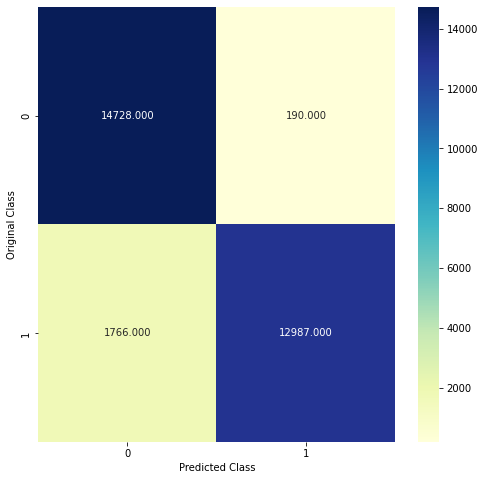

-------------------- Precision matrix (Columm Sum=1) --------------------


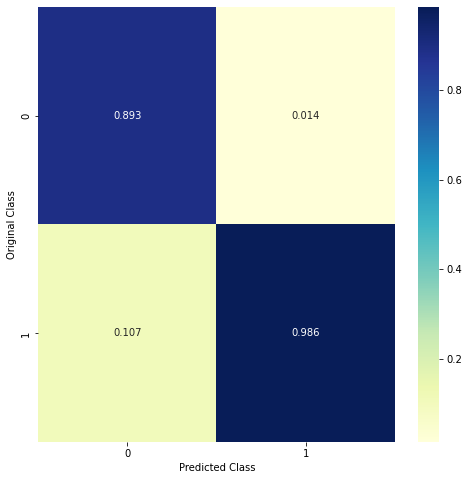

-------------------- Recall matrix (Row sum=1) --------------------


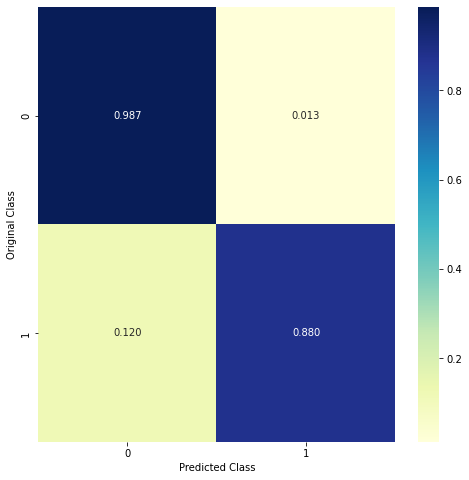

In [32]:
plot_confusion_matrix(y_test, pred)

# Naive bayes

for alpha = 1e-20
CV_Log Loss : 0.6785720203659967
CV_f1 score : 0.5600221983281883
CV_recall : 0.5472107367992951
train_f1 score : 0.565033726238332
train_recall : 0.553743427092897
*********************************************
for alpha = 1e-18
CV_Log Loss : 0.6785720203659967
CV_f1 score : 0.5600221983281883
CV_recall : 0.5472107367992951
train_f1 score : 0.565033726238332
train_recall : 0.553743427092897
*********************************************
for alpha = 1e-16
CV_Log Loss : 0.6785720203659967
CV_f1 score : 0.5600221983281883
CV_recall : 0.5472107367992951
train_f1 score : 0.565033726238332
train_recall : 0.553743427092897
*********************************************
for alpha = 1e-14
CV_Log Loss : 0.6785720203659967
CV_f1 score : 0.5600221983281883
CV_recall : 0.5472107367992951
train_f1 score : 0.565033726238332
train_recall : 0.553743427092897
*********************************************
for alpha = 1e-12
CV_Log Loss : 0.6785720203659967
CV_f1 score : 0.5600221983281883


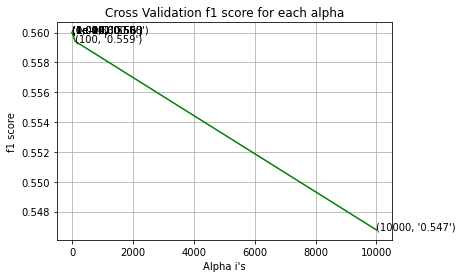

In [ ]:
from sklearn.naive_bayes import MultinomialNB

alpha = [10 ** x for x in range(-20,6, 2)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_CV)
    cv_log_error_array.append(metrics.f1_score(y_CV, sig_clf.predict(X_CV)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("CV_Log Loss :",metrics.log_loss(y_CV, sig_clf_probs))  
    print("CV_f1 score :",metrics.f1_score(y_CV, sig_clf.predict(X_CV)))  
    print("CV_recall :",metrics.recall_score(y_CV, sig_clf.predict(X_CV)))
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print("train_recall :",metrics.recall_score(y_train, sig_clf.predict(X_train))) 
    print('*********************************************')
    #y_pred = sig_clf.predict(X_CV)
    #plot_confusion_matrix(y_CV, y_pred)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation f1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()
  

#Naive bayes with best alpha on X_test :

test_Log Loss : 0.6767732683171881
train_Log Loss : 0.6773500850059424
test_f1 score : 0.5654681725555211
train_f1 score : 0.565033726238332
*********************************************
test_matrix
-------------------- Confusion matrix --------------------


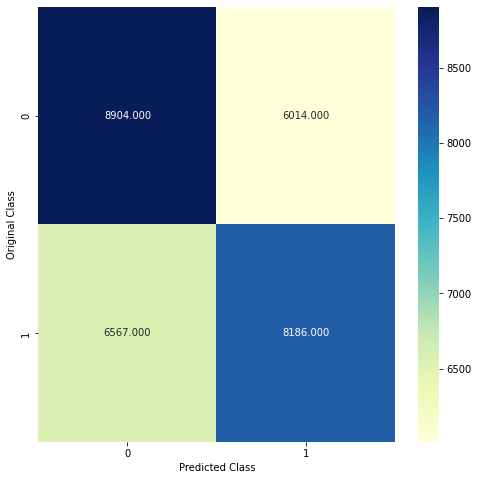

-------------------- Precision matrix (Columm Sum=1) --------------------


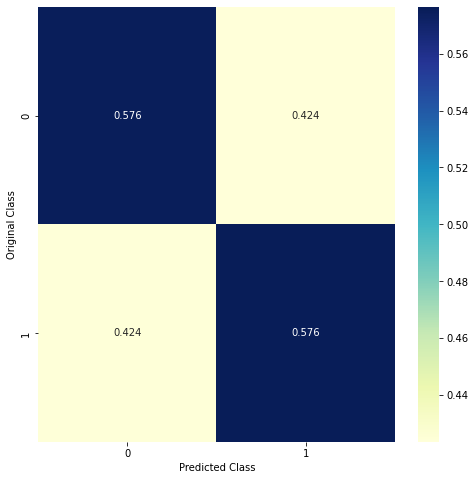

-------------------- Recall matrix (Row sum=1) --------------------


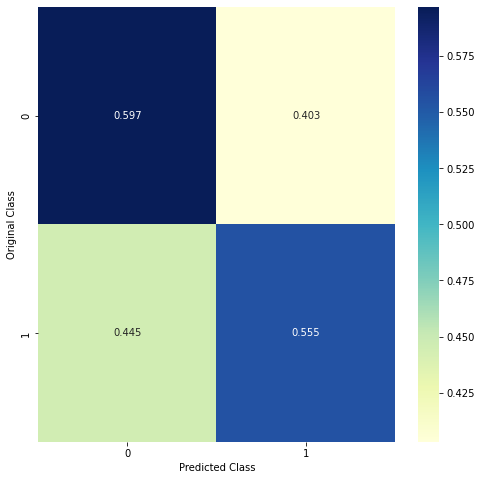

******************************************************
******************************************************
train_matrix
-------------------- Confusion matrix --------------------


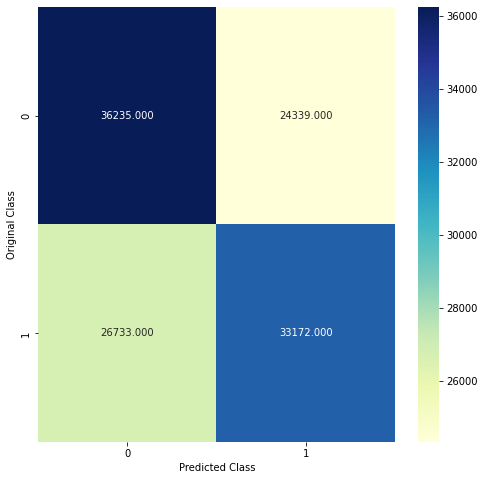

-------------------- Precision matrix (Columm Sum=1) --------------------


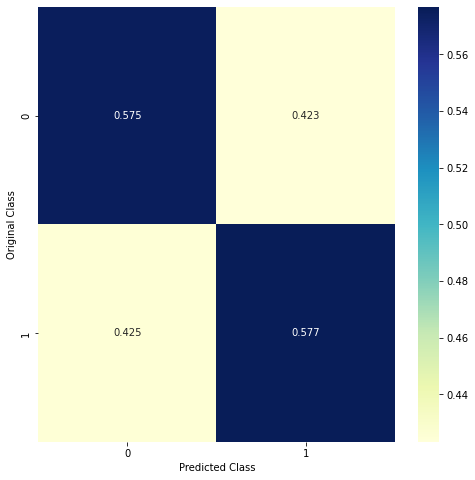

-------------------- Recall matrix (Row sum=1) --------------------


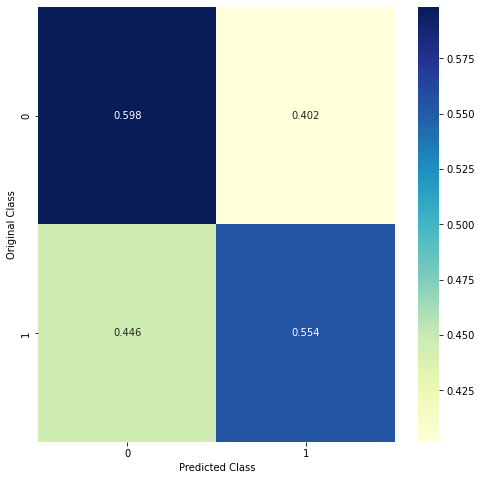

In [ ]:
    clf = MultinomialNB(alpha=0.001)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    cv_log_error_array.append(metrics.f1_score(y_test, sig_clf.predict(X_test)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("test_Log Loss :",metrics.log_loss(y_test, sig_clf.predict_proba(X_test)))  
    print("train_Log Loss :",metrics.log_loss(y_train, sig_clf.predict_proba(X_train)))
    print("test_f1 score :",metrics.f1_score(y_test, sig_clf.predict(X_test)))  
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print('*********************************************')
    print('test_matrix')
    y_pred = sig_clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred)
    print('******************************************************')
    print('******************************************************')
    print('train_matrix')
    y_pred = sig_clf.predict(X_train)
    plot_confusion_matrix(y_train, y_pred)

___________________________________________________________
___________________________________________________________
# SGDClassifier (log)

for alpha = 1e-10
CV_Log Loss : 0.6931319043364943
CV_f1 score : 0.5027637344118638
CV_recall : 0.5027637344118638
train_f1 score : 0.5027764174669445
train_recall : 0.5027764174669445
*********************************************
for alpha = 1e-08
CV_Log Loss : 0.6931319043364943
CV_f1 score : 0.5027637344118638
CV_recall : 0.5027637344118638
train_f1 score : 0.5027764174669445
train_recall : 0.5027764174669445
*********************************************
for alpha = 1e-06
CV_Log Loss : 0.5440214514230453
CV_f1 score : 0.7552072800808898
CV_recall : 0.7552072800808898
train_f1 score : 0.7532433038122827
train_recall : 0.7532433038122827
*********************************************
for alpha = 0.0001
CV_Log Loss : 0.5427418052751644
CV_f1 score : 0.7456016177957533
CV_recall : 0.7456016177957533
train_f1 score : 0.747665568273309
train_recall : 0.747665568273309
*********************************************
for alpha = 0.01
CV_Log Loss : 0.5519504519817081
CV_f1 score : 0.73080552746

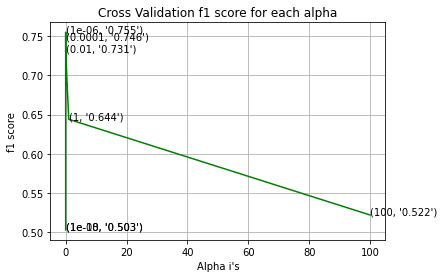

In [ ]:
alpha = [10 ** x for x in range(-10,4, 2)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_CV)
    cv_log_error_array.append(metrics.f1_score(y_CV, sig_clf.predict(X_CV),average='micro'))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("CV_Log Loss :",metrics.log_loss(y_CV, sig_clf_probs))  
    print("CV_f1 score :",metrics.f1_score(y_CV, sig_clf.predict(X_CV),average='micro'))  
    print("CV_recall :",metrics.recall_score(y_CV, sig_clf.predict(X_CV),average='micro'))
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train),average='micro'))  
    print("train_recall :",metrics.recall_score(y_train, sig_clf.predict(X_train),average='micro')) 
    print('*********************************************')

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation f1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()
  

#SGDClassifier (log) with best alpha on X_test :

test_Log Loss : 0.5298228971601978
train_Log Loss : 0.5276534112707599
test_f1 score : 0.7521974306964164
train_f1 score : 0.7536142262630988
*********************************************
test_matrix
-------------------- Confusion matrix --------------------


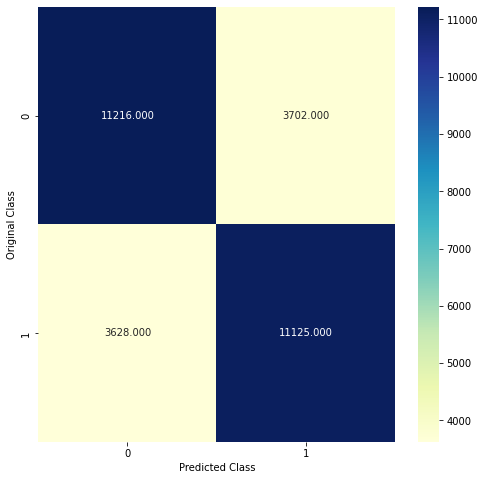

-------------------- Precision matrix (Columm Sum=1) --------------------


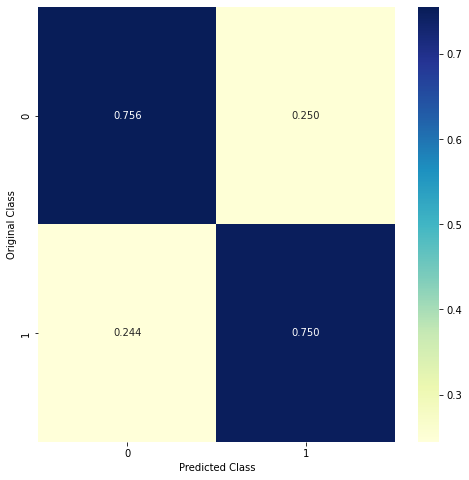

-------------------- Recall matrix (Row sum=1) --------------------


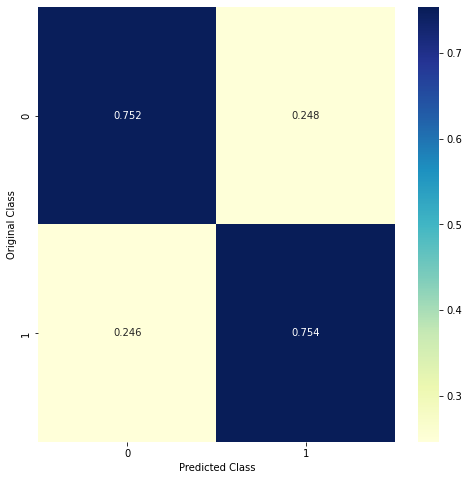

******************************************************
******************************************************
train_matrix
-------------------- Confusion matrix --------------------


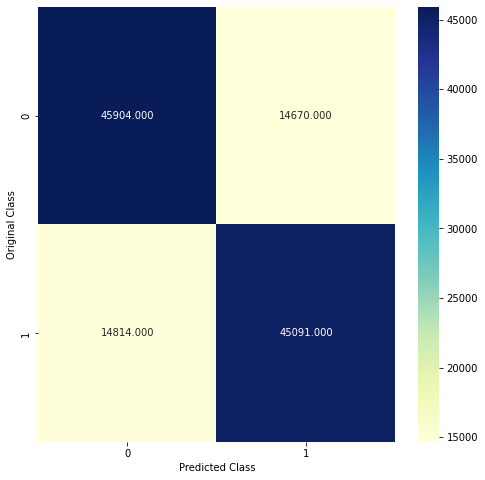

-------------------- Precision matrix (Columm Sum=1) --------------------


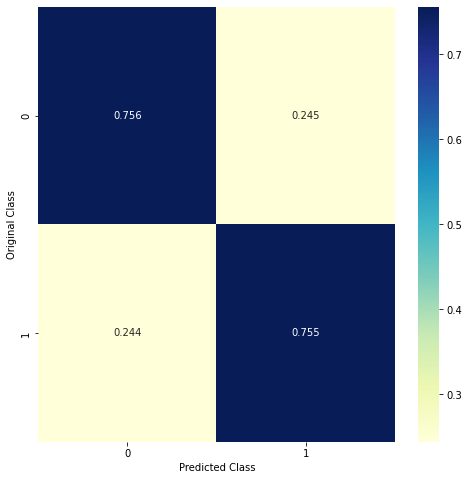

-------------------- Recall matrix (Row sum=1) --------------------


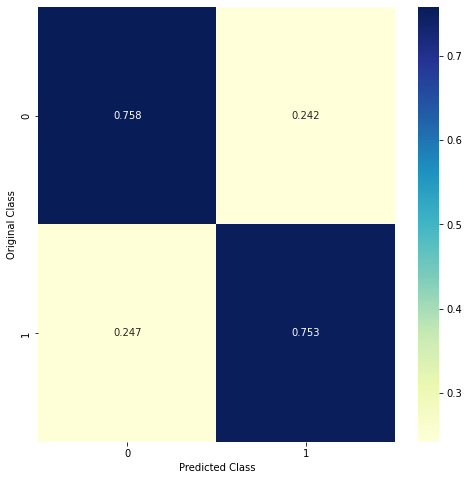

In [ ]:
    i = 0.00001
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    cv_log_error_array.append(metrics.f1_score(y_test, sig_clf.predict(X_test)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("test_Log Loss :",metrics.log_loss(y_test, sig_clf.predict_proba(X_test)))  
    print("train_Log Loss :",metrics.log_loss(y_train, sig_clf.predict_proba(X_train)))
    print("test_f1 score :",metrics.f1_score(y_test, sig_clf.predict(X_test)))  
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print('*********************************************')
    print('test_matrix')
    y_pred = sig_clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred)
    print('******************************************************')
    print('******************************************************')
    print('train_matrix')
    y_pred = sig_clf.predict(X_train)
    plot_confusion_matrix(y_train, y_pred)

# SGDClassifier (hinge)

for alpha = 1e-06
CV_Log Loss : 0.5331068671426421
CV_f1 score : 0.7449301946397635
CV_recall : 0.743238663322714
train_f1 score : 0.7458349703662217
train_recall : 0.744695768299808
*********************************************
for alpha = 0.0001
CV_Log Loss : 0.5348299382148858
CV_f1 score : 0.7451686309139693
CV_recall : 0.7435775774418762
train_f1 score : 0.7460004675862529
train_recall : 0.7457140472414656
*********************************************
for alpha = 0.01
CV_Log Loss : 0.5405469252790841
CV_f1 score : 0.736381954168232
CV_recall : 0.7307666237375449
train_f1 score : 0.7391960810629447
train_recall : 0.7355312578248894
*********************************************
for alpha = 1
CV_Log Loss : 0.636289747159327
CV_f1 score : 0.6427649017875349
CV_recall : 0.6410221649833933
train_f1 score : 0.6491880323947798
train_recall : 0.6456389283031466
*********************************************
for alpha = 100
CV_Log Loss : 0.6928972284392539
CV_f1 score : 0.440195091739568
CV_

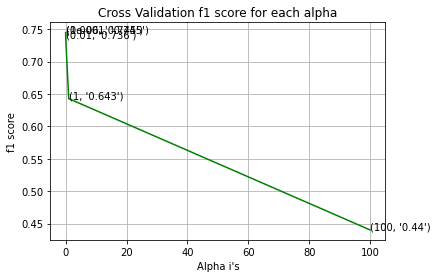

In [ ]:
alpha = [10 ** x for x in range(-6, 4, 2)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_CV)
    cv_log_error_array.append(metrics.f1_score(y_CV, sig_clf.predict(X_CV)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("CV_Log Loss :",metrics.log_loss(y_CV, sig_clf_probs))  
    print("CV_f1 score :",metrics.f1_score(y_CV, sig_clf.predict(X_CV)))  
    print("CV_recall :",metrics.recall_score(y_CV, sig_clf.predict(X_CV)))
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print("train_recall :",metrics.recall_score(y_train, sig_clf.predict(X_train))) 
    print('*********************************************')

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation f1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()
  

#SGDClassifier (log) with best alpha on X_test :

test_Log Loss : 0.5324980318380955
train_Log Loss : 0.530035718910053
test_f1 score : 0.7432432432432433
train_f1 score : 0.7452983476514652
*********************************************
test_matrix
-------------------- Confusion matrix --------------------


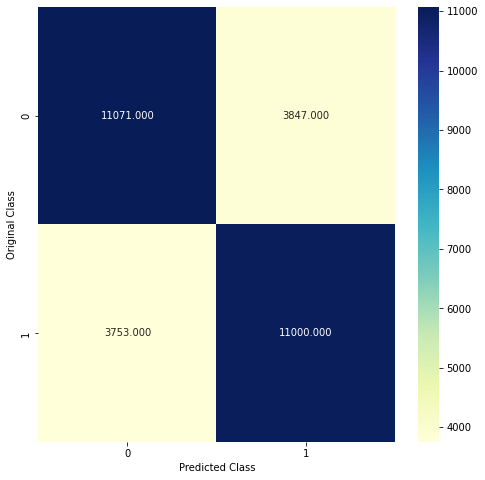

-------------------- Precision matrix (Columm Sum=1) --------------------


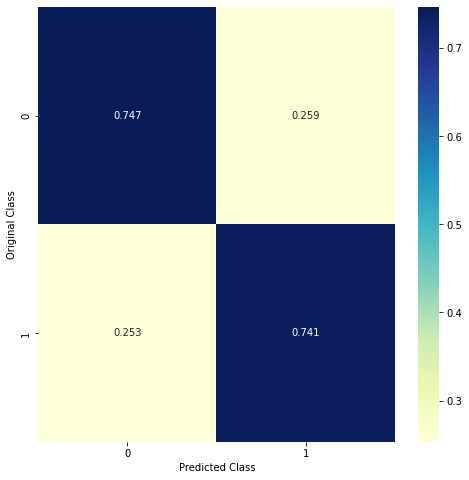

-------------------- Recall matrix (Row sum=1) --------------------


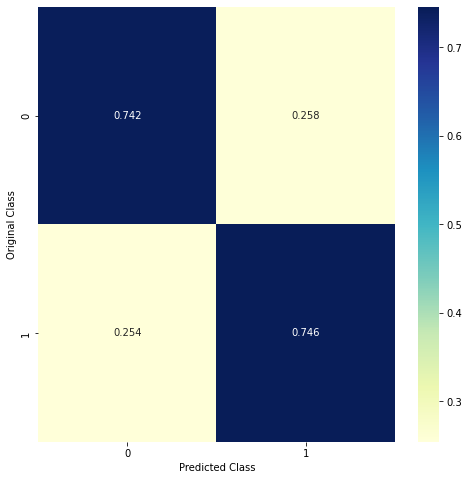

******************************************************
******************************************************
train_matrix
-------------------- Confusion matrix --------------------


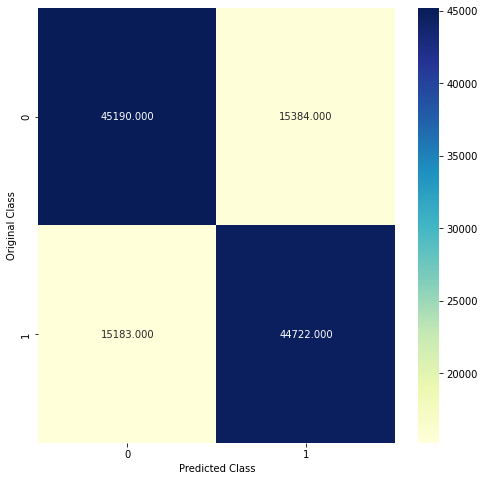

-------------------- Precision matrix (Columm Sum=1) --------------------


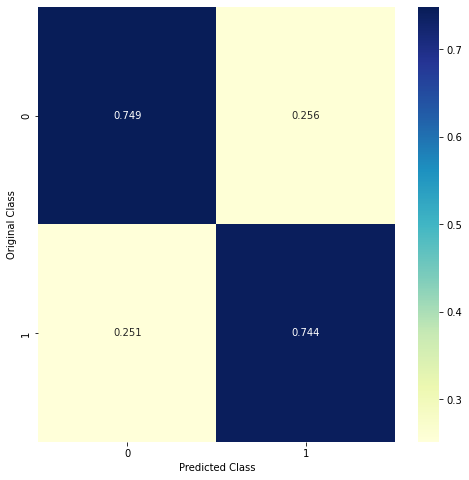

-------------------- Recall matrix (Row sum=1) --------------------


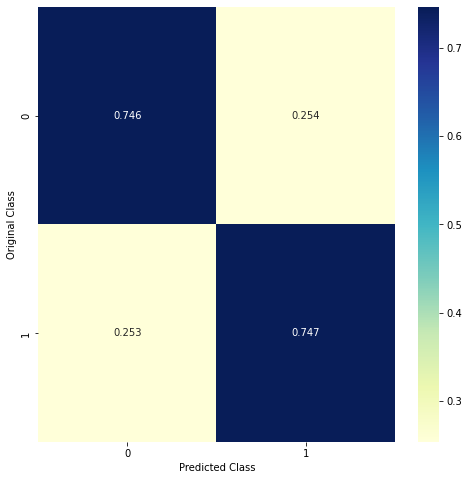

In [ ]:
    i = 0.00001
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    cv_log_error_array.append(metrics.f1_score(y_test, sig_clf.predict(X_test)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("test_Log Loss :",metrics.log_loss(y_test, sig_clf.predict_proba(X_test)))  
    print("train_Log Loss :",metrics.log_loss(y_train, sig_clf.predict_proba(X_train)))
    print("test_f1 score :",metrics.f1_score(y_test, sig_clf.predict(X_test)))  
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print('*********************************************')
    print('test_matrix')
    y_pred = sig_clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred)
    print('******************************************************')
    print('******************************************************')
    print('train_matrix')
    y_pred = sig_clf.predict(X_train)
    plot_confusion_matrix(y_train, y_pred)

# Decision Tree

for alpha = 3
CV_Log Loss : 0.4940304535751475
CV_f1 score : 0.7433848473426309
CV_recall : 0.6684064258116993
train_f1 score : 0.7429793565185047
train_recall : 0.666889241298723
*********************************************
for alpha = 6
CV_Log Loss : 0.3829421095446391
CV_f1 score : 0.819351663033542
CV_recall : 0.7898054632956009
train_f1 score : 0.8194259563768608
train_recall : 0.7861113429596862
*********************************************
for alpha = 9
CV_Log Loss : 0.32349798304169247
CV_f1 score : 0.8554930088977665
CV_recall : 0.7983460990984884
train_f1 score : 0.85879700055479
train_recall : 0.8010516651364661
*********************************************
for alpha = 12
CV_Log Loss : 0.28054571286015845
CV_f1 score : 0.8876404494382022
CV_recall : 0.8300006778282383
train_f1 score : 0.8990152161547214
train_recall : 0.8442534012185962
*********************************************
for alpha = 15
CV_Log Loss : 0.2762716926960796
CV_f1 score : 0.900487981203687
CV_recall : 0

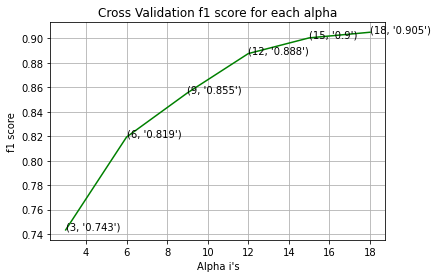

In [ ]:
from sklearn.tree import DecisionTreeClassifier
alpha = [3,6,9,12,15,18]

cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = DecisionTreeClassifier(max_depth=i, class_weight= 'balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_CV)
    cv_log_error_array.append(metrics.f1_score(y_CV, sig_clf.predict(X_CV)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("CV_Log Loss :",metrics.log_loss(y_CV, sig_clf_probs))  
    print("CV_f1 score :",metrics.f1_score(y_CV, sig_clf.predict(X_CV)))  
    print("CV_recall :",metrics.recall_score(y_CV, sig_clf.predict(X_CV)))
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print("train_recall :",metrics.recall_score(y_train, sig_clf.predict(X_train))) 
    print('*********************************************')

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation f1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()
  

# Decision Tree with best alpha on X_test :

test_Log Loss : 0.27962470699511466
train_Log Loss : 0.21163146658879847
test_f1 score : 0.8987300553565615
train_f1 score : 0.9332126951220584
*********************************************
test_matrix
-------------------- Confusion matrix --------------------


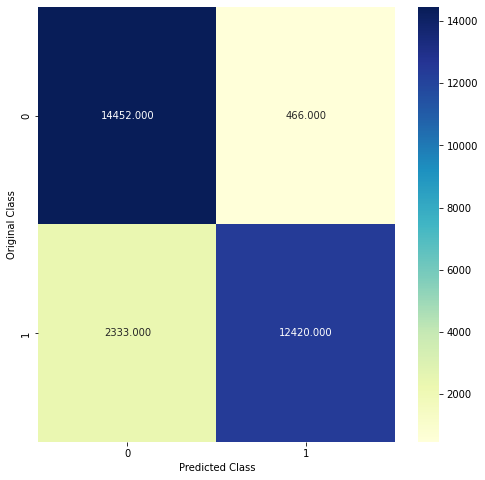

-------------------- Precision matrix (Columm Sum=1) --------------------


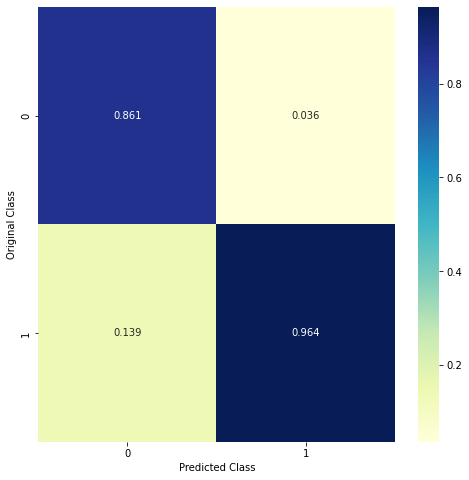

-------------------- Recall matrix (Row sum=1) --------------------


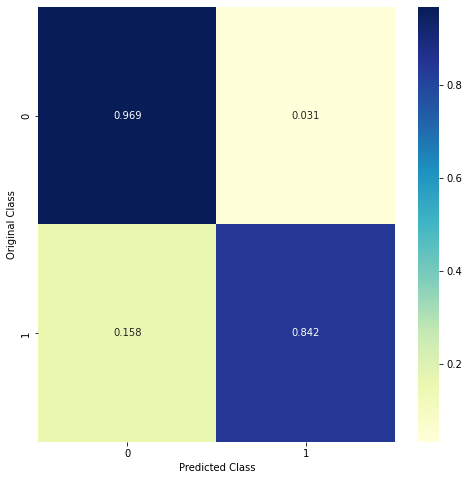

******************************************************
******************************************************
train_matrix
-------------------- Confusion matrix --------------------


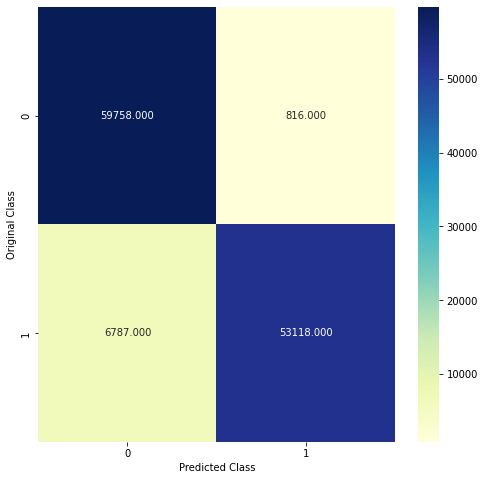

-------------------- Precision matrix (Columm Sum=1) --------------------


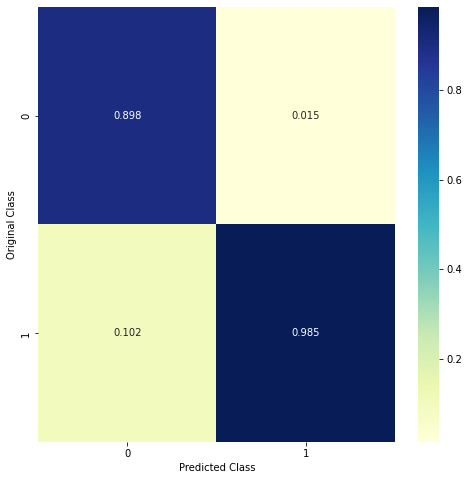

-------------------- Recall matrix (Row sum=1) --------------------


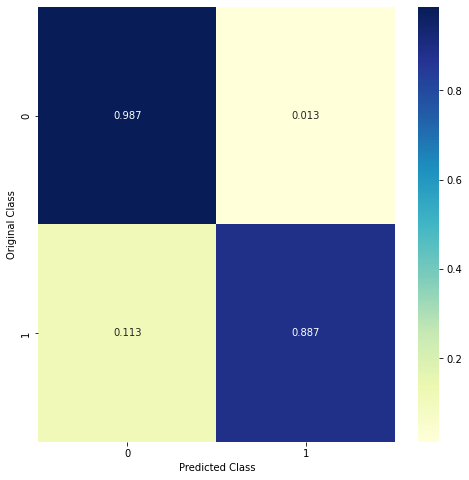

In [ ]:
    i = 15
    clf =  DecisionTreeClassifier(max_depth=i, class_weight= 'balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    cv_log_error_array.append(metrics.f1_score(y_test, sig_clf.predict(X_test)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("test_Log Loss :",metrics.log_loss(y_test, sig_clf.predict_proba(X_test)))  
    print("train_Log Loss :",metrics.log_loss(y_train, sig_clf.predict_proba(X_train)))
    print("test_f1 score :",metrics.f1_score(y_test, sig_clf.predict(X_test)))  
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print('*********************************************')
    print('test_matrix')
    y_pred = sig_clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred)
    print('******************************************************')
    print('******************************************************')
    print('train_matrix')
    y_pred = sig_clf.predict(X_train)
    plot_confusion_matrix(y_train, y_pred)  


#Random Forest

for alpha = 3
CV_Log Loss : 0.27615025686257294
CV_f1 score : 0.8991422444603289
CV_recall : 0.8526401409882736
train_f1 score : 0.9205230860679382
train_recall : 0.8789416576245722
*********************************************
for alpha = 6
CV_Log Loss : 0.2606315249643818
CV_f1 score : 0.9007379026536115
CV_recall : 0.8605029485528367
train_f1 score : 0.9240937833407061
train_recall : 0.8892079125281696
*********************************************
for alpha = 9
CV_Log Loss : 0.251817230960456
CV_f1 score : 0.9032143743133572
CV_recall : 0.8637565240967938
train_f1 score : 0.927347094403716
train_recall : 0.893197562807779
*********************************************
for alpha = 12
CV_Log Loss : 0.25156776940585895
CV_f1 score : 0.9003750088445484
CV_recall : 0.8625364332678099
train_f1 score : 0.9248981075257653
train_recall : 0.8921125114765045
*********************************************


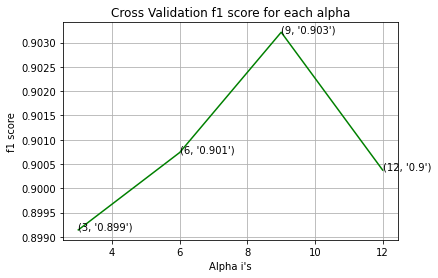

In [ ]:
alpha = [3,6,9,12]

cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = RandomForestClassifier(n_estimators=i,max_depth=15, class_weight= 'balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_CV)
    cv_log_error_array.append(metrics.f1_score(y_CV, sig_clf.predict(X_CV)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("CV_Log Loss :",metrics.log_loss(y_CV, sig_clf_probs))  
    print("CV_f1 score :",metrics.f1_score(y_CV, sig_clf.predict(X_CV)))  
    print("CV_recall :",metrics.recall_score(y_CV, sig_clf.predict(X_CV)))
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print("train_recall :",metrics.recall_score(y_train, sig_clf.predict(X_train))) 
    print('*********************************************')

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation f1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()
  

#Random Forest best alpha on X_test :

test_Log Loss : 0.256861865556229
train_Log Loss : 0.18988810223153083
test_f1 score : 0.9015599023734568
train_f1 score : 0.9249324651935998
*********************************************
test_matrix
-------------------- Confusion matrix --------------------


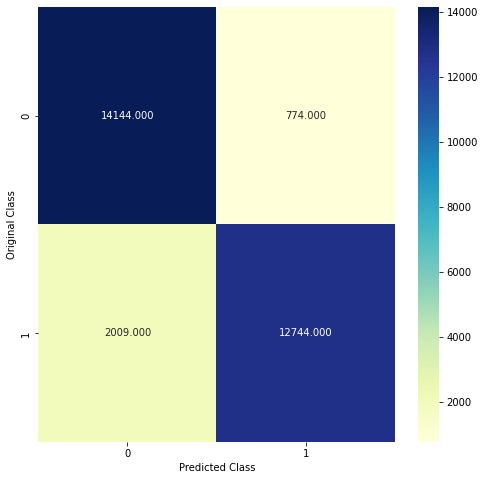

-------------------- Precision matrix (Columm Sum=1) --------------------


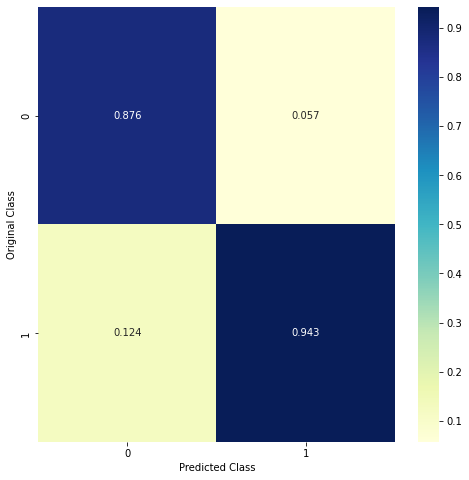

-------------------- Recall matrix (Row sum=1) --------------------


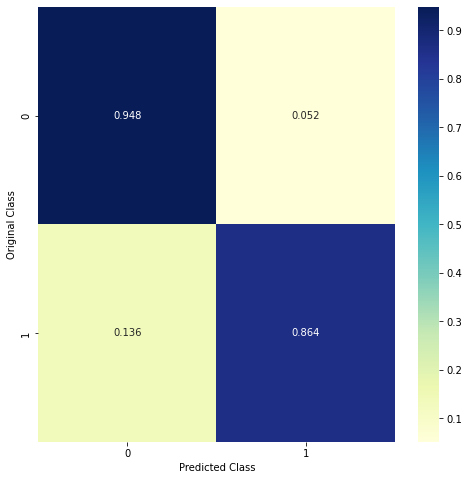

******************************************************
******************************************************
train_matrix
-------------------- Confusion matrix --------------------


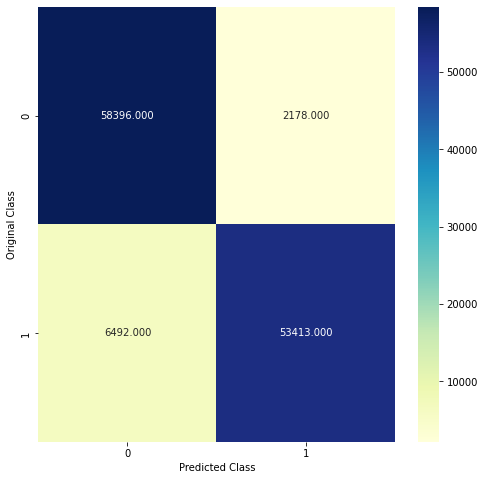

-------------------- Precision matrix (Columm Sum=1) --------------------


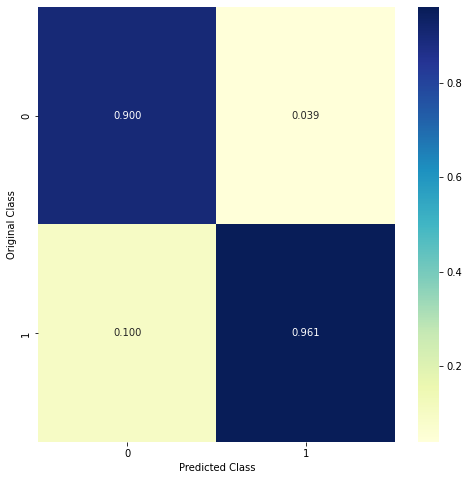

-------------------- Recall matrix (Row sum=1) --------------------


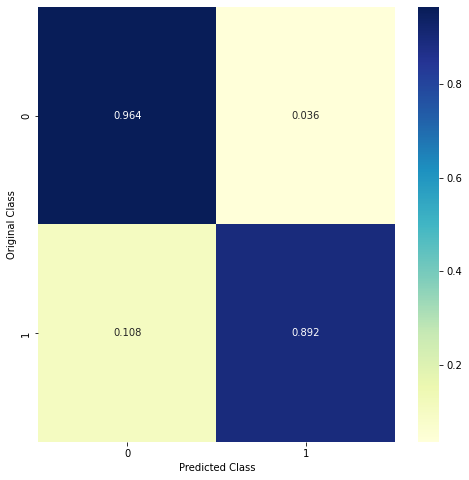

In [ ]:
    i = 9
    clf =  RandomForestClassifier(n_estimators=i,max_depth=15, class_weight= 'balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    cv_log_error_array.append(metrics.f1_score(y_test, sig_clf.predict(X_test)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("test_Log Loss :",metrics.log_loss(y_test, sig_clf.predict_proba(X_test)))  
    print("train_Log Loss :",metrics.log_loss(y_train, sig_clf.predict_proba(X_train)))
    print("test_f1 score :",metrics.f1_score(y_test, sig_clf.predict(X_test)))  
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print('*********************************************')
    print('test_matrix')
    y_pred = sig_clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred)
    print('******************************************************')
    print('******************************************************')
    print('train_matrix')
    y_pred = sig_clf.predict(X_train)
    plot_confusion_matrix(y_train, y_pred)  


# boosting

In [ ]:
!pip install xgboost --upgrade
from xgboost import XGBClassifier
    
    

     |████████▌                       | 46.2 MB 2.0 MB/s eta 0:01:05

ERROR: Operation cancelled by user


for alpha = 3
[19:34:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

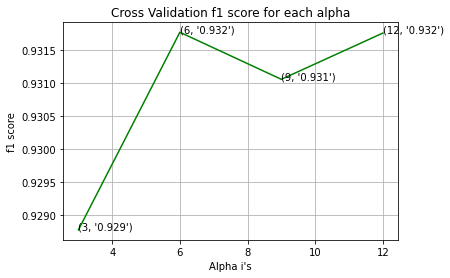

In [ ]:
alpha = [3,6,9,12]

cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = clf =  XGBClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_CV)
    cv_log_error_array.append(metrics.f1_score(y_CV, sig_clf.predict(X_CV)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("CV_Log Loss :",metrics.log_loss(y_CV, sig_clf_probs))  
    print("CV_f1 score :",metrics.f1_score(y_CV, sig_clf.predict(X_CV)))  
    print("CV_recall :",metrics.recall_score(y_CV, sig_clf.predict(X_CV)))
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print("train_recall :",metrics.recall_score(y_train, sig_clf.predict(X_train))) 
    print('*********************************************')

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation f1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()
  

#XGBoost best alpha on X_test :

[20:18:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:18:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

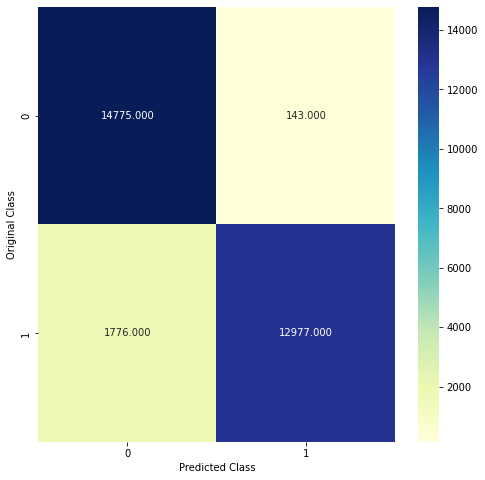

-------------------- Precision matrix (Columm Sum=1) --------------------


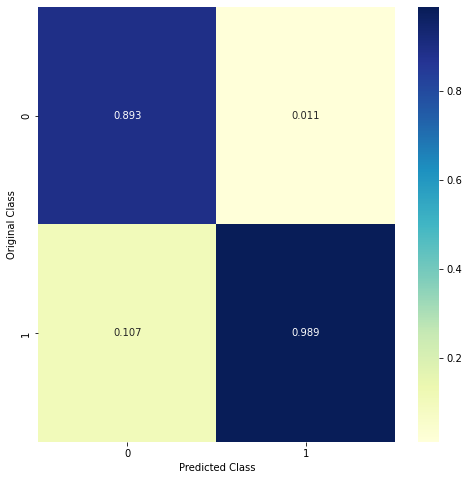

-------------------- Recall matrix (Row sum=1) --------------------


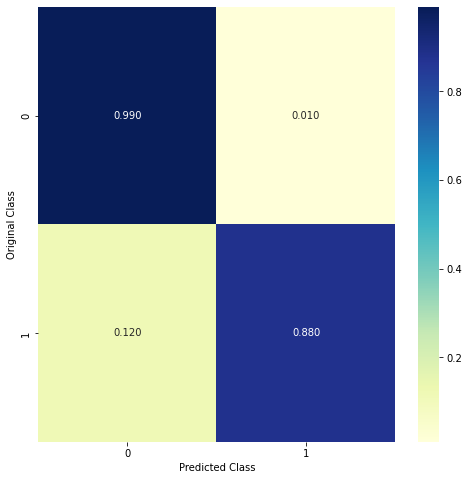

******************************************************
******************************************************
train_matrix
-------------------- Confusion matrix --------------------


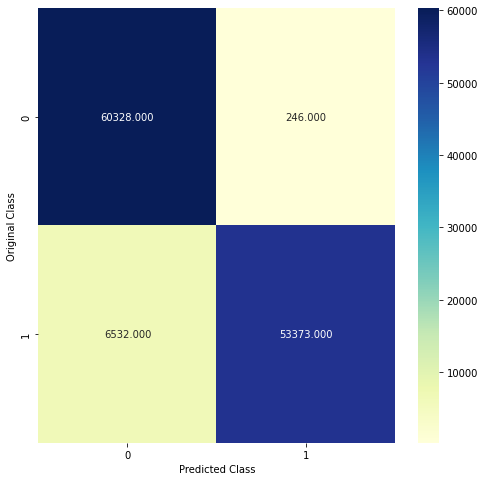

-------------------- Precision matrix (Columm Sum=1) --------------------


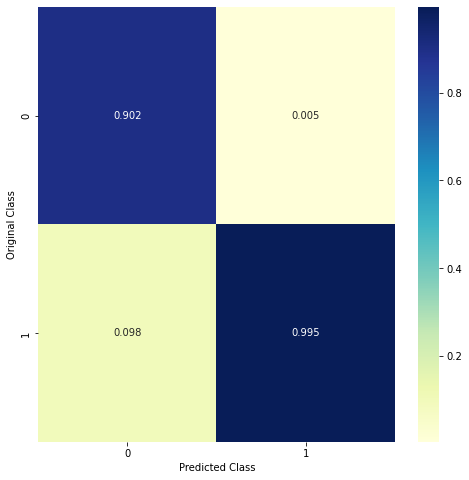

-------------------- Recall matrix (Row sum=1) --------------------


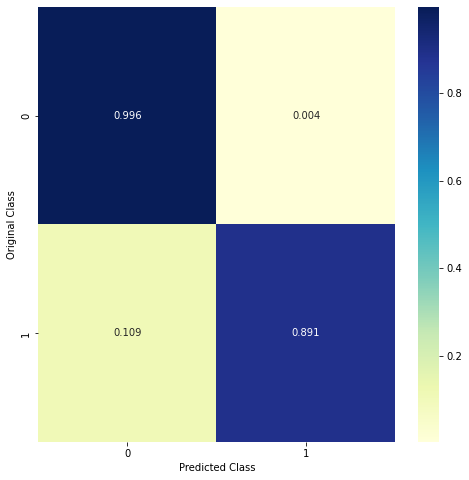

In [ ]:
    i = 6
    clf =  XGBClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    cv_log_error_array.append(metrics.f1_score(y_test, sig_clf.predict(X_test)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("test_Log Loss :",metrics.log_loss(y_test, sig_clf.predict_proba(X_test)))  
    print("train_Log Loss :",metrics.log_loss(y_train, sig_clf.predict_proba(X_train)))
    print("test_f1 score :",metrics.f1_score(y_test, sig_clf.predict(X_test)))  
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print('*********************************************')
    print('test_matrix')
    y_pred = sig_clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred)
    print('******************************************************')
    print('******************************************************')
    print('train_matrix')
    y_pred = sig_clf.predict(X_train)
    plot_confusion_matrix(y_train, y_pred)  


#GradientBoostingClassifier

for alpha = 3
CV_Log Loss : 0.22942478604587987
CV_f1 score : 0.914572864321608
CV_recall : 0.8697214125940487
train_f1 score : 0.9142631301598454
train_recall : 0.8688590267924213
*********************************************
for alpha = 6
CV_Log Loss : 0.1968484924832127
CV_f1 score : 0.9300953408886491
CV_recall : 0.8761607808581305
train_f1 score : 0.9335235024184546
train_recall : 0.8795426091311243
*********************************************
for alpha = 9
CV_Log Loss : 0.19086038748218395
CV_f1 score : 0.9323741007194244
CV_recall : 0.8784653968684335
train_f1 score : 0.9429777781695418
train_recall : 0.892897087054503
*********************************************
for alpha = 13
CV_Log Loss : 0.18729202350354224
CV_f1 score : 0.9333621185952792
CV_recall : 0.8791432251067579
train_f1 score : 0.9788293048784645
train_recall : 0.9585844253401219
*********************************************


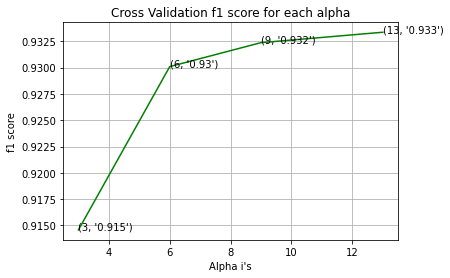

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

alpha = [3,6,9,13]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = GradientBoostingClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_CV)
    cv_log_error_array.append(metrics.f1_score(y_CV, sig_clf.predict(X_CV)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("CV_Log Loss :",metrics.log_loss(y_CV, sig_clf_probs))  
    print("CV_f1 score :",metrics.f1_score(y_CV, sig_clf.predict(X_CV)))  
    print("CV_recall :",metrics.recall_score(y_CV, sig_clf.predict(X_CV)))
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print("train_recall :",metrics.recall_score(y_train, sig_clf.predict(X_train))) 
    print('*********************************************')
    #y_pred = sig_clf.predict(X_CV)
    #plot_confusion_matrix(y_CV, y_pred)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation f1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()

#GradientBoostingClassifier with best alpha

test_Log Loss : 0.2046534045113517
train_Log Loss : 0.18400568502417625
test_f1 score : 0.925813668182146
train_f1 score : 0.9335140546238959
*********************************************
test_matrix
-------------------- Confusion matrix --------------------


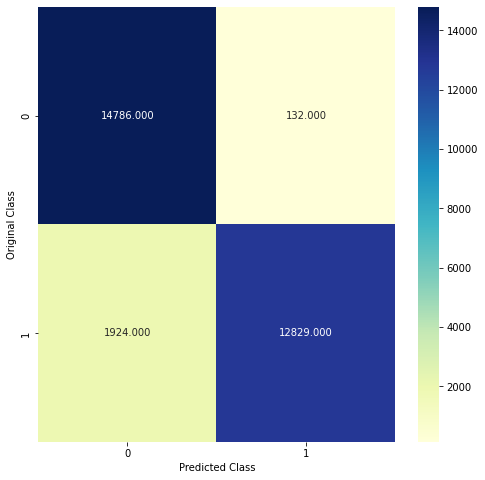

-------------------- Precision matrix (Columm Sum=1) --------------------


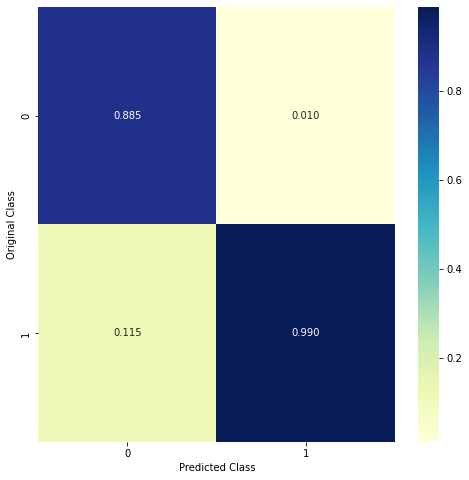

-------------------- Recall matrix (Row sum=1) --------------------


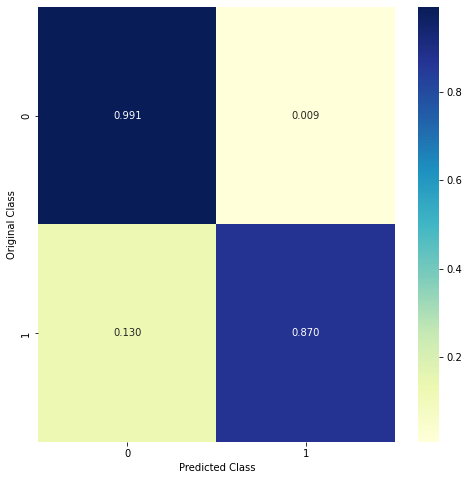

******************************************************
******************************************************
train_matrix
-------------------- Confusion matrix --------------------


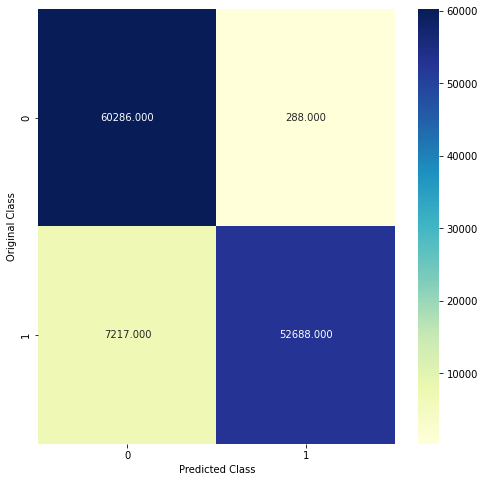

-------------------- Precision matrix (Columm Sum=1) --------------------


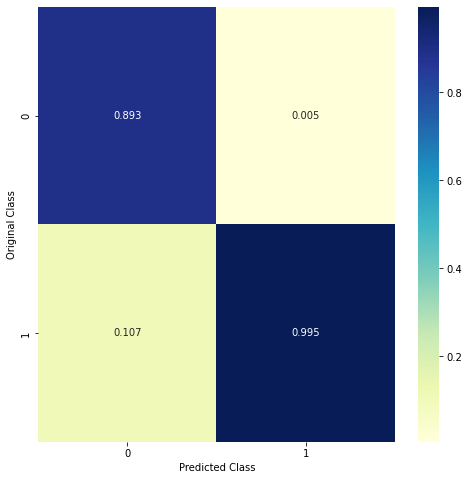

-------------------- Recall matrix (Row sum=1) --------------------


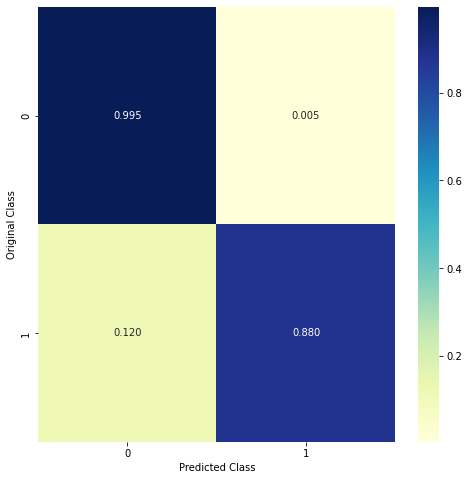

In [ ]:
    i = 6
    clf =  GradientBoostingClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    cv_log_error_array.append(metrics.f1_score(y_test, sig_clf.predict(X_test)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("test_Log Loss :",metrics.log_loss(y_test, sig_clf.predict_proba(X_test)))  
    print("train_Log Loss :",metrics.log_loss(y_train, sig_clf.predict_proba(X_train)))
    print("test_f1 score :",metrics.f1_score(y_test, sig_clf.predict(X_test)))  
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print('*********************************************')
    print('test_matrix')
    y_pred = sig_clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred)
    print('******************************************************')
    print('******************************************************')
    print('train_matrix')
    y_pred = sig_clf.predict(X_train)
    plot_confusion_matrix(y_train, y_pred)  


# Gradient Boosting vs xgboost understanding : 
1. In simple Gradient Boosting the gradient of loss is used to minimize the loss function .
2. Xgboost uses second order derivative of the loss to minimize the loss function .
3. Performance of Xgboost is high compared to simple Gradient Boosting because,
XGBoost uses regularization (L1 & L2), which improves model performance.
It also uses parallelization techniques

# Result table

# Final XGBoost model :

In [ ]:
    i = 6
    clf =  XGBClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    cv_log_error_array.append(metrics.f1_score(y_test, sig_clf.predict(X_test)))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("test_Log Loss :",metrics.log_loss(y_test, sig_clf.predict_proba(X_test)))  
    print("train_Log Loss :",metrics.log_loss(y_train, sig_clf.predict_proba(X_train)))
    print("test_f1 score :",metrics.f1_score(y_test, sig_clf.predict(X_test)))  
    print("train_f1 score :",metrics.f1_score(y_train, sig_clf.predict(X_train)))  
    print('*********************************************')
 

[20:29:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:31:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

#confusion_matrix train

-------------------- Confusion matrix --------------------


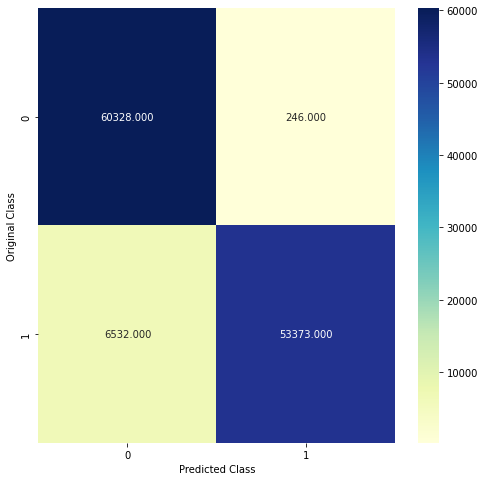

-------------------- Precision matrix (Columm Sum=1) --------------------


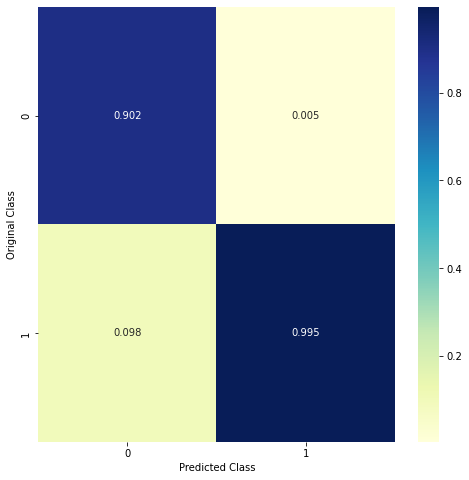

-------------------- Recall matrix (Row sum=1) --------------------


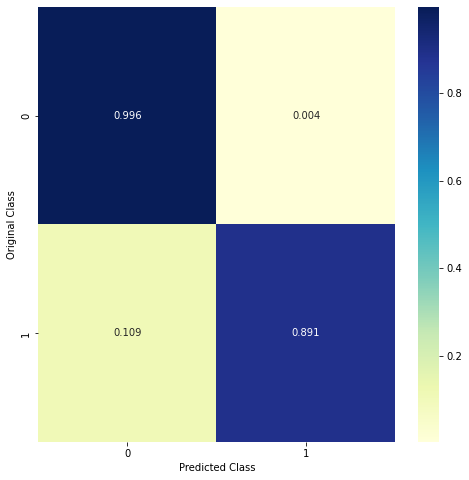

In [ ]:
y_pred = sig_clf.predict(X_train)
plot_confusion_matrix(y_train, y_pred)

#confusion_matrix test

-------------------- Confusion matrix --------------------


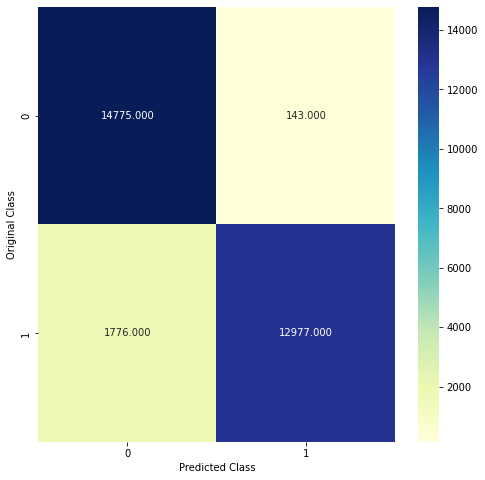

-------------------- Precision matrix (Columm Sum=1) --------------------


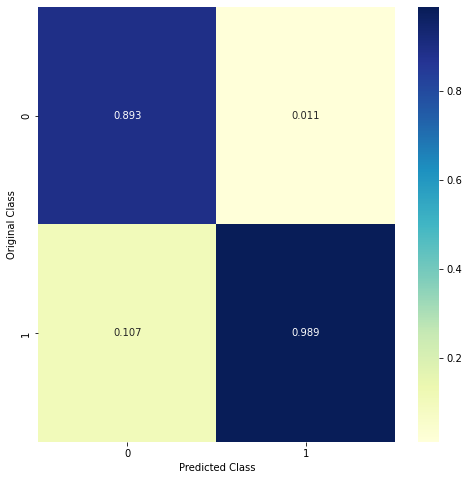

-------------------- Recall matrix (Row sum=1) --------------------


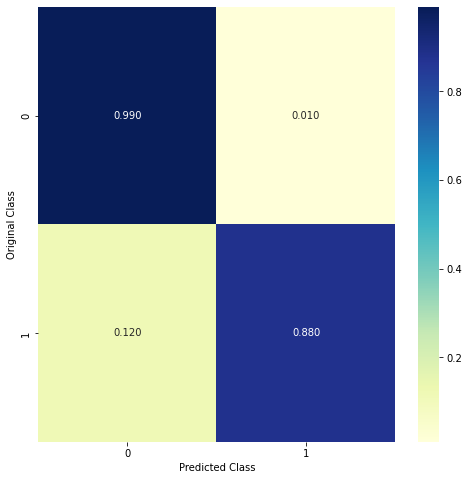

In [ ]:
y_pred = sig_clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

# feature importance 

In [ ]:

im = clf.feature_importances_
col_name = X_train.columns

important = dict(zip(im,col_name))
val_sort = sorted(important.keys(),reverse =True)

top_fea_tree = dict()
for i in val_sort[0:]:
    top_fea_tree[i*100] = important[i]
     
df_fea = pd.DataFrame({'feature_name': col_name ,'importance':im*100})
df_fea = df_fea.sort_values('importance', ascending=False ,ignore_index=True)
print(df_fea)

                feature_name  importance
0           number_inpatient   25.437931
1                diabetesMed    9.502528
2        Service_Utilization    8.927188
3             num_procedures    6.107133
4           number_diagnoses    5.428515
5                     change    5.395327
6           time_in_hospital    4.387305
7           number_emergency    3.369326
8               pioglitazone    3.350749
9                  metformin    3.154953
10                    gender    3.100274
11             rosiglitazone    2.905526
12         number_outpatient    2.392648
13                   insulin    2.257204
14               glimepiride    1.957888
15                 glipizide    1.492788
16                      race    1.290797
17                 glyburide    1.245204
18  discharge_disposition_id    1.164575
19       admission_source_id    1.049597
20                payer_code    0.907750
21         admission_type_id    0.617487
22         medical_specialty    0.579900
23              

# loading original data for final predict function :

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/case_study_1/diabetic_data.csv')

data_ = data.drop(['encounter_id', 'patient_nbr','weight','readmitted'], axis=1)


#Final predict function :

In [ ]:

def predict(quary) :
  # preprocessing on quary point
  quary = quary.replace('?','Missing')
  num_data = quary[num_col[:-1]]
  survice = num_data['number_outpatient']+num_data['number_emergency']+num_data['number_inpatient']
  num_data = num_data.apply(lambda x : np.log(x+1))
  quary[num_col[:-1]] = num_data
  quary[num_col[-1]] = survice
  for lb in label_dict_save.keys():
    label = label_dict_save[lb]
    label = label_dict_save[lb]
    quary[lb] = label.transform(np.array([quary[lb]]))[0]

  
  sig_clf_probs = sig_clf.predict_proba(np.array(quary).reshape(1,-1))
  y_pred = sig_clf.predict(np.array(quary).reshape(1,-1))
  print('Probability : ',sig_clf_probs[0])
  print('prediction : ',y_pred)
  if y_pred ==1 :
    print('patient will be readmitted within 30 days')
  else :
    print('patient will not be readmitted within 30 days')



In [ ]:
i =234
quary = data_.loc[i]
predict(quary)
print('actual ',data.loc[i]['readmitted'])

Probability :  [0.89956703 0.10043297]
prediction :  [0]
patient will not be readmitted within 30 days
actual  >30


In [ ]:
i = 87
quary = data_.loc[i]
predict(quary)
print('actual ',data.loc[i]['readmitted'])

Probability :  [0.90973719 0.09026281]
prediction :  [0]
patient will not be readmitted within 30 days
actual  NO


In [ ]:
i = 65057 
quary = data_.loc[i]
predict(quary)
print('actual ',data.loc[i]['readmitted'])

Probability :  [0.55568962 0.44431038]
prediction :  [0]
patient will not be readmitted within 30 days
actual  <30


In [ ]:
i = 57616 
quary = data_.loc[i]
predict(quary)
print('actual ',data.loc[i]['readmitted'])

Probability :  [0.75328205 0.24671795]
prediction :  [0]
patient will not be readmitted within 30 days
actual  >30


# Gradient Boosting vs xgboost understanding : 
1. In simple Gradient Boosting the gradient of loss is used to minimize the loss function .
2. Xgboost uses second order derivative of the loss to minimize the loss function .
3. Performance of Xgboost is high compared to simple Gradient Boosting because,
XGBoost uses regularization (L1 & L2), which improves model performance.
It also uses parallelization techniques


# Result table

In [34]:
model = ['Custom Stacking classifier','GradientBoosting', 'XGBoost','Random Forest', 'Decision Tree', 'SGD( hinge )', 'SGD( log )', 'MultinomialNB']

cv_f1 =[0.92996,0.93,0.93176, 0.90, 0.898, 0.75, 0.751, 0.571]
table = pd.DataFrame(columns=['Model','CV_F1_score'])
table['Model'] = model
table['CV_F1_score'] = cv_f1
table

,Model,CV_F1_score
0,Custom Stacking classifier,0.92996
1,GradientBoosting,0.93000
2,XGBoost,0.93176
3,Random Forest,0.90000
4,Decision Tree,0.89800
5,SGD( hinge ),0.75000
6,SGD( log ),0.75100
7,MultinomialNB,0.57100
